In [1]:
import time
import pandas as pd
import numpy as np
import datetime
import warnings
warnings.filterwarnings("ignore")
import re
from glob import glob
from tqdm import tqdm
from wordcloud import WordCloud 
# get_ipython().run_line_magic('matplotlib', 'inline')
from matplotlib import font_manager, rc
import platform
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from konlpy.tag import Okt
from collections import Counter
import missingno

In [2]:
# 한글 폰트 위치를 넣어주세요 (위에서 나눔고딕 파일을 해당 경로에 복사붙여넣기 했을 경우 그대로 실행하셔도 무방합니다.)
font_name = matplotlib.font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name() # NanumGothic.otf
matplotlib.rc('font', family=font_name)

In [3]:
data_df = pd.read_excel('./raw_data_df.xlsx')

In [4]:
desc_df = pd.DataFrame(columns=['급여대상','중량','주원료','등급','기능','입자크기'])
for i in range(len(data_df['설명(전체)'])):
    
    try:
        desc_list = data_df['설명(전체)'][i].split('|')

        desc_whole  = ' '.join(desc for desc in desc_list)

        if '급여대상' not in desc_whole:
            target = np.NaN
        if '중량' not in desc_whole:
            weight= np.NaN
        if '주원료' not in desc_whole:
            main_ingredient = np.NaN
        if '등급' not in desc_whole:
            grade = np.NaN
        if '기능' not in desc_whole:
            function= np.NaN
        if '입자크기' not in desc_whole:
            particle_size= np.NaN

        for desc_item in desc_list:
            if '급여대상' in desc_item:
                target = desc_item[desc_item.find(":")+1:]
            elif '중량' in desc_item:
                weight = desc_item[desc_item.find(":")+1:]
            elif '주원료' in desc_item:
                main_ingredient = desc_item[desc_item.find(":")+1:]
            elif '등급' in desc_item:
                grade = desc_item[desc_item.find(":")+1:]
            elif '기능' in desc_item:
                function = desc_item[desc_item.find(":")+1:]
            elif '입자크기' in desc_item:
                particle_size = desc_item[desc_item.find(":")+1:]

        new_tuple = {'급여대상':target,'중량':weight,'주원료':main_ingredient,'등급':grade,'기능':function,'입자크기':particle_size}
        desc_df = desc_df.append(new_tuple,ignore_index=True)
    except:
        new_tuple = {'급여대상':np.NaN,'중량':np.NaN,'주원료':np.NaN,'등급':np.NaN,'기능':np.NaN,'입자크기':np.NaN}
        desc_df = desc_df.append(new_tuple,ignore_index=True)

data_df = pd.concat([data_df,desc_df],axis=1)
data_df = data_df.drop('설명(전체)',axis=1)
data_df

,이름,이미지,링크,가격,분류,평점,리뷰건수,구매건수,등록일,찜하기,급여대상,중량,주원료,등급,기능,입자크기
0,더마독 강아지 사료 관절/체중조절 2kg 골든리트리버 포메라니안 말티즈 말티푸 토이...,https://shopping-phinf.pstatic.net/main_817758...,https://adcr.naver.com/adcr?x=EhUapCGNud8jpQCs...,"29,000원",건식사료,NaN,NaN,NaN,등록일 2019.02.,129,"퍼피, 어덜트, 시니어, 임신/수유, 대형견",2kg,오리,홀리스틱(1등급),"영양공급, 다이어트/중성화, 체중유지",보통 8~13mm
1,더마독 강아지 사료 피부/모질/눈물 2kg 골든리트리버 포메라니안 말티즈 말티푸 토...,https://shopping-phinf.pstatic.net/main_817762...,https://adcr.naver.com/adcr?x=RgeMAXOhOXCjjixA...,"29,000원",건식사료,NaN,NaN,NaN,등록일 2019.02.,94,"퍼피, 어덜트, 시니어, 임신/수유, 대형견",2kg,"오리, 연어",홀리스틱(1등급),"영양공급, 저알러지, 식욕증진(기호성)",보통 8~13mm
2,마이펫닥터 시그니처 유기농 70%함유 오가닉 피부 사료 2kg,https://shopping-phinf.pstatic.net/main_822353...,https://adcr.naver.com/adcr?x=6QQ8XYuxPyWxJ/ng...,"27,000원",건식사료,NaN,"7,366","5,149",등록일 2019.10.,481,"퍼피, 어덜트, 시니어, 임신/수유, 대형견",2kg,오리,유기농,NaN,NaN
3,마이펫닥터 시그니처 도그 푸드 슬리밍 컨트롤 다이어트 사료,https://shopping-phinf.pstatic.net/main_211407...,https://cr.shopping.naver.com/adcr.nhn?x=vtZuF...,"최저27,990원",건식사료,별점 4.8,"10,036",NaN,등록일 2019.10.,125,"퍼피, 어덜트, 시니어, 임신/수유, 대형견",NaN,오리,유기농,"다이어트/중성화, 처방식, 종합비타민, 체중유지, 항산화",보통 8~13mm
4,마이펫닥터 시그니처 유기농 알러제닉 눈물 사료,https://shopping-phinf.pstatic.net/main_264062...,https://cr.shopping.naver.com/adcr.nhn?x=faSRE...,"최저17,000원",건식사료,별점 4.7,"8,261",NaN,등록일 2021.03.,180,"퍼피, 어덜트, 시니어, 임신/수유, 대형견",NaN,연어,유기농,"저알러지, 눈물개선/눈건강, 종합비타민, 소화/장기능개선, 항산화",보통 8~13mm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10095,스텔라앤츄이스 키블사료 치킨 터키 화이트피쉬 1.6kg,https://shopping-phinf.pstatic.net/main_832925...,https://cr.shopping.naver.com/adcr.nhn?x=lCHea...,"45,000원",건식사료,NaN,23,63,등록일 2021.07.,25,"퍼피, 어덜트, 시니어, 임신/수유, 대형견",1.6kg,"닭, 칠면조, 연어",그레인프리,"뼈/관절강화, 피부/털개선, 저알러지, 눈물개선/눈건강, 식욕증진(기호성)",NaN
10096,뉴트리나 뉴트리나 프라임 골드 15kg 대용량 강아지사료,https://shopping-phinf.pstatic.net/main_305603...,https://cr.shopping.naver.com/adcr.nhn?x=GrWIA...,"14,990원",건식사료,NaN,1,NaN,등록일 2022.01.,0,NaN,NaN,NaN,NaN,NaN,NaN
10097,로얄캐닌 강아지사료 말티즈 어덜트 500g,https://shopping-phinf.pstatic.net/main_295363...,https://cr.shopping.naver.com/adcr.nhn?x=DM9VH...,"8,640원",건식사료,NaN,7,NaN,등록일 2021.11.,1,NaN,NaN,NaN,NaN,NaN,NaN
10098,유기농사료 오리지7 소고기 2kg,https://shopping-phinf.pstatic.net/main_822913...,https://cr.shopping.naver.com/adcr.nhn?x=4tuW3...,"26,000원",소프트사료,NaN,17,14,등록일 2022.03.,2,"퍼피, 어덜트, 시니어, 임신/수유, 대형견",2kg,소,유기농,"영양공급, 저알러지, 소화/장기능개선, 식욕증진(기호성), 체중유지",보통 8~13mm


In [5]:
# 가격 열 전처리 (쓸데없는 단어 제외, 숫자만)
data_df['가격'] = data_df['가격'].apply(lambda x : int(re.sub(r'[가-힣,]',"",x[:x.find('원')])))

# 평점 열 전처리 ('평점' 단어 제거)
for i in range(len(data_df['평점'])):
    if pd.isnull(data_df['평점'][i]):
        pass
    else:
        data_df['평점'][i] = float(re.sub(r'[가-힣,]',"",data_df['평점'][i]))

# 등록일 열 전처리 ('등록일' 단어 제거)
data_df['등록일'] = data_df['등록일'].apply(lambda x : re.sub(r'[가-힣,]',"",x))

# 등급 열 전처리 (',', ' '  제거)
for i in range(len(data_df['등급'])):
    if pd.isnull(data_df['등급'][i]):
        pass
    else:
        data_df['등급'][i] = data_df['등급'][i].replace(",", "")
        data_df['등급'][i] = data_df['등급'][i].replace(" ", "")
        
# 리뷰건수, 구매건수 열 특수기호 제거
data_df['리뷰건수'] = data_df.리뷰건수.str.replace(',', '')
data_df['구매건수'] = data_df.구매건수.str.replace(',', '')

# 중량 열 전처리 (쓸데없는 단어 제외, 숫자만)
weight_col = []

for i in range(len(data_df['중량'])):
    try:
        tmp_str = data_df['중량'][i].split(',')[0].split('~')[0].split('/')[0]
        if 'mg' in tmp_str:
            tmp_str = re.sub(r'[가-힣A-Za-z\s]',"",tmp_str)
            weight_col.append(float(tmp_str)/10)
        elif 'kg' in tmp_str:
            tmp_str = re.sub(r'[가-힣A-Za-z\s]',"",tmp_str)
            weight_col.append(float(tmp_str)*1000)
        elif 'g' in tmp_str:
            tmp_str = re.sub(r'[가-힣A-Za-z\s]',"",tmp_str)
            weight_col.append(float(tmp_str))
        elif 'mg' in data_df['중량'][i]:
            tmp_str = re.sub(r'[가-힣A-Za-z\s]',"",tmp_str)
            weight_col.append(float(tmp_str)/10)
        elif 'kg' in data_df['중량'][i]:
            tmp_str = re.sub(r'[가-힣A-Za-z\s]',"",tmp_str)
            weight_col.append(float(tmp_str)*1000)
        elif 'g' in data_df['중량'][i]:
            tmp_str = re.sub(r'[가-힣A-Za-z\s]',"",tmp_str)
            weight_col.append(float(tmp_str))
        else:
            weight_col.append(np.NaN)
    except:
        weight_col.append(np.NaN)
        
data_df['중량'] = weight_col

In [6]:
# 연속형 데이터 타입 변경

data_df['리뷰건수'] = data_df['리뷰건수'].apply(pd.to_numeric, errors='coerce')
data_df['구매건수'] = data_df['구매건수'].apply(pd.to_numeric, errors='coerce')
data_df['중량'] = data_df['중량'].apply(pd.to_numeric, errors='coerce')
data_df['평점'] = data_df['평점'].apply(pd.to_numeric, errors='coerce')
data_df['찜하기'] = pd.to_numeric(data_df['찜하기'],errors='coerce',downcast='integer')
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10100 entries, 0 to 10099
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   이름      10100 non-null  object 
 1   이미지     10100 non-null  object 
 2   링크      10100 non-null  object 
 3   가격      10100 non-null  int64  
 4   분류      10067 non-null  object 
 5   평점      892 non-null    float64
 6   리뷰건수    8521 non-null   float64
 7   구매건수    4253 non-null   float64
 8   등록일     10100 non-null  object 
 9   찜하기     10093 non-null  float64
 10  급여대상    6540 non-null   object 
 11  중량      4756 non-null   float64
 12  주원료     6202 non-null   object 
 13  등급      4819 non-null   object 
 14  기능      6151 non-null   object 
 15  입자크기    2016 non-null   object 
dtypes: float64(5), int64(1), object(10)
memory usage: 1.2+ MB


In [7]:
data_df.to_excel('./data_df_pre.xlsx', index = False, encoding = 'utf-8-sig')

<AxesSubplot:>

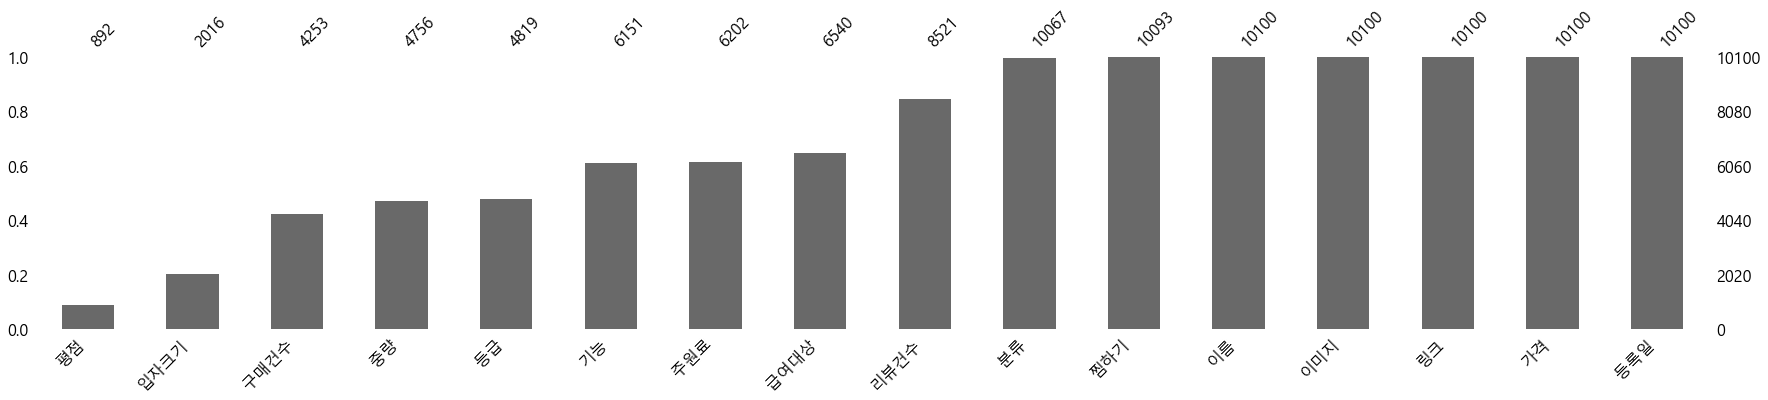

In [8]:
missingno.bar(data_df, sort='ascending', figsize = (30,5))

Text(0.5, 1.0, '중량 분포')

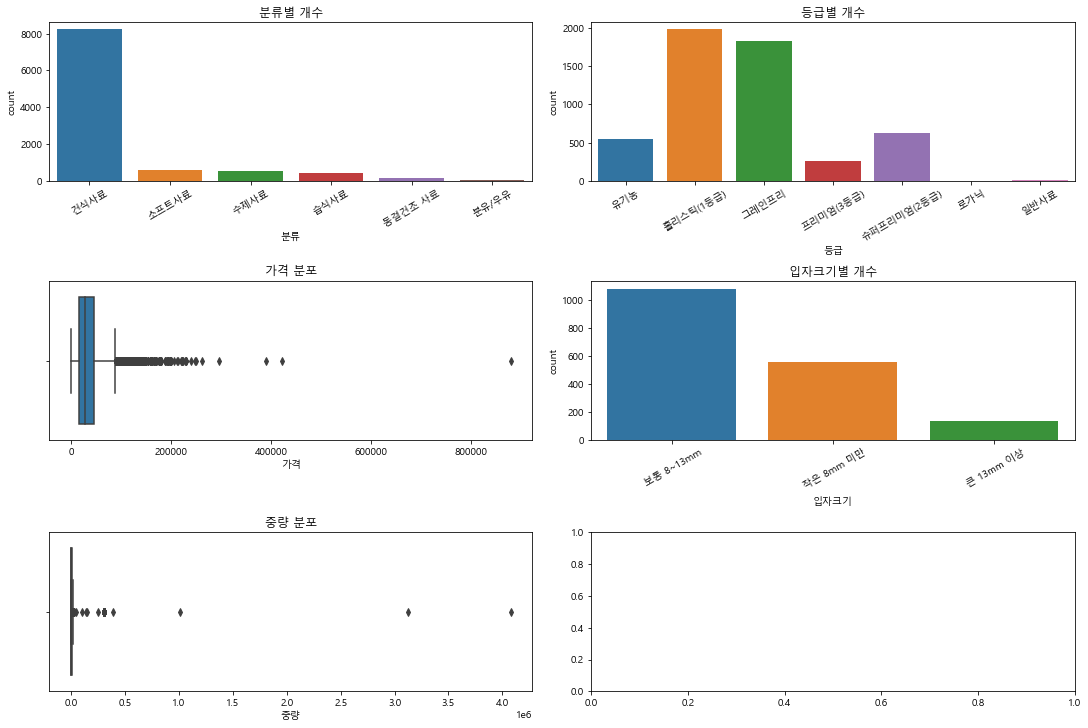

In [21]:
fig, axes = plt.subplots(3, 2, figsize=(15,10),constrained_layout=True)

sns.countplot(data=data_df, x='분류', ax = axes[0,0])
sns.countplot(data=data_df, x='등급', ax = axes[0,1])
sns.boxplot(data=data_df, x='가격', ax = axes[1,0])
sns.countplot(data=data_df, x='입자크기', ax = axes[1,1])
sns.boxplot(data=data_df, x='중량', ax = axes[2,0])
axes[0,0].set_xticklabels(axes[0,0].get_xticklabels(),rotation = 30)
axes[0,1].set_xticklabels(axes[0,1].get_xticklabels(),rotation = 30)
axes[1,1].set_xticklabels(axes[1,1].get_xticklabels(),rotation = 30)
axes[0,0].set_title("분류별 개수")
axes[0,1].set_title("등급별 개수")
axes[1,0].set_title("가격 분포")
axes[1,1].set_title("입자크기별 개수")
axes[2,0].set_title("중량 분포")

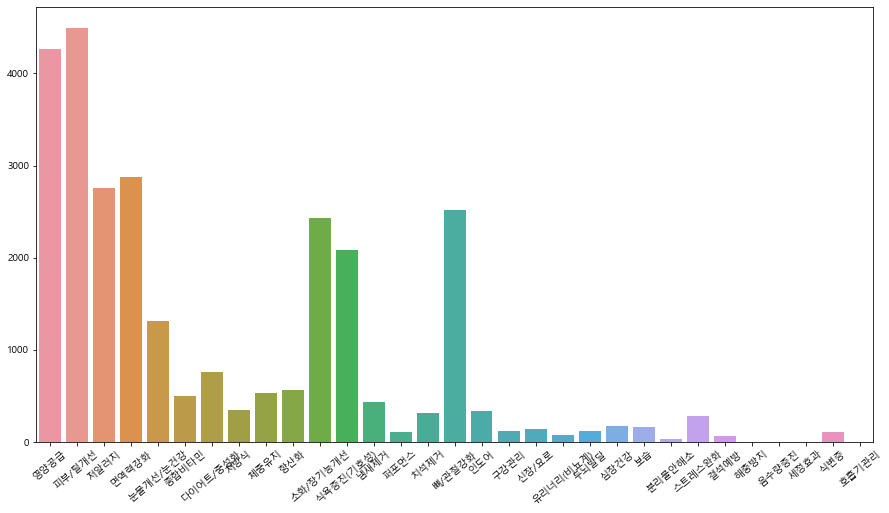

In [22]:
corpus_fun = ",".join(list(data_df['기능'].dropna()))
corpus_fun = corpus_fun.replace(" ","")
functions_all = list(filter(None, corpus_fun.split(",")))

result = Counter(functions_all)
functions_dic = dict(result)

keys = list(functions_dic.keys())
# get values in the same order as keys, and parse percentage values
vals = list(functions_dic.values())
plt.figure(figsize = (15,8))
ax =sns.barplot(x=keys, y=vals)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 40)

plt.show()

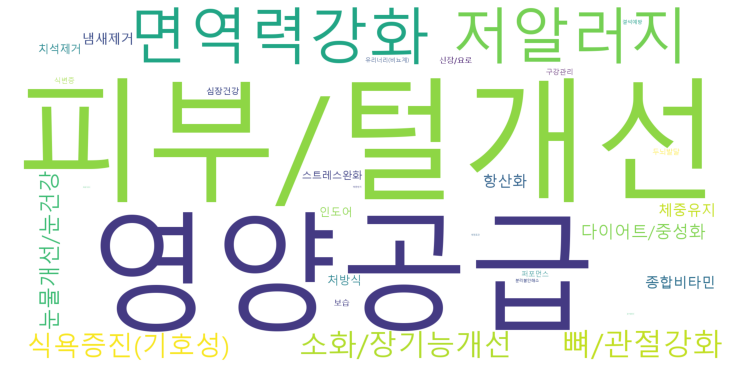

In [23]:
from wordcloud import WordCloud


word_cloud = WordCloud(font_path="C:/Windows/Fonts/malgun.ttf", 
                       # font_path="C:/Windows/Fonts/NanumSquareB.ttf" <- 나눔스퀘어 폰트가 설치되어 있을 경우
                       # font_path="/System/Library/Fonts/Supplemental/AppleGothic.ttf <- MacOS의 경우
                       
                       width=2000, height=1000, # 이 부분을 수정하시면 실제 워드클라우드의 크기가 바뀝니다 (해상도가 바뀝니다)
                       # prefer_horizontal= 1.0, # 이 부분의 주석을 해제하시면 단어들이 가로로만 그려지게 됩니다. (0~1)
                       background_color='white')
word_cloud.generate_from_frequencies(functions_dic) 
plt.figure(figsize=(10,10)) # 이 부분을 수정하시면 화면에서 보여지는 워드클라우드의 크기가 바뀝니다 
plt.imshow(word_cloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

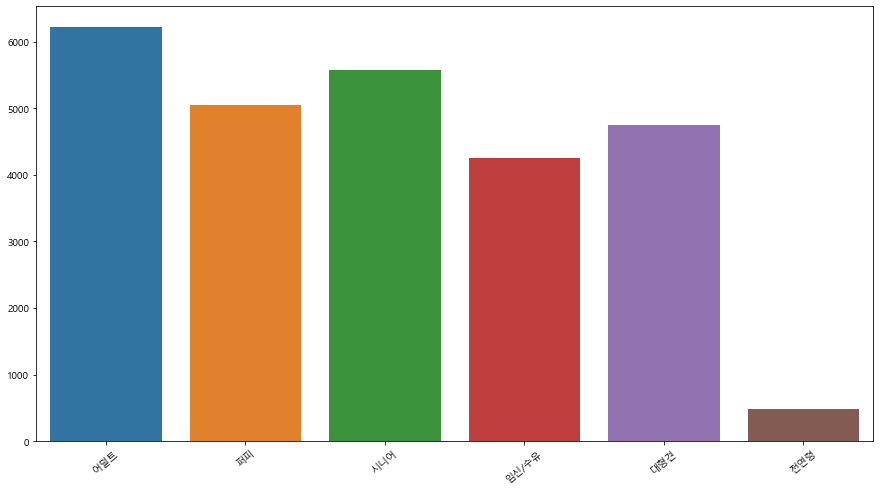

In [24]:
corpus_target = ",".join(list(data_df['급여대상'].dropna()))
corpus_target = corpus_target.replace(" ","")
targets_all = list(filter(None, corpus_target.split(",")))

result = Counter(targets_all)
targets_dic = dict(result)

keys = list(targets_dic.keys())
# get values in the same order as keys, and parse percentage values
vals = list(targets_dic.values())
plt.figure(figsize = (15,8))
ax =sns.barplot(x=keys, y=vals)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 40)

plt.show()

In [25]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10100 entries, 0 to 10099
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   이름      10100 non-null  object 
 1   링크      10100 non-null  object 
 2   가격      10100 non-null  int64  
 3   분류      10065 non-null  object 
 4   평점      893 non-null    float64
 5   리뷰건수    8794 non-null   float64
 6   구매건수    4441 non-null   float64
 7   등록일     10100 non-null  object 
 8   찜하기     10097 non-null  float64
 9   급여대상    6753 non-null   object 
 10  중량      5147 non-null   float64
 11  주원료     6511 non-null   object 
 12  등급      5260 non-null   object 
 13  기능      6269 non-null   object 
 14  입자크기    1785 non-null   object 
dtypes: float64(5), int64(1), object(9)
memory usage: 1.2+ MB


In [9]:
# 결측치 없는 행만 모아서 file 만들기

data_df_full = data_df.drop(['구매건수','평점'],axis=1).dropna()

In [10]:
data_df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1027 entries, 41 to 10098
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   이름      1027 non-null   object 
 1   이미지     1027 non-null   object 
 2   링크      1027 non-null   object 
 3   가격      1027 non-null   int64  
 4   분류      1027 non-null   object 
 5   리뷰건수    1027 non-null   float64
 6   등록일     1027 non-null   object 
 7   찜하기     1027 non-null   float64
 8   급여대상    1027 non-null   object 
 9   중량      1027 non-null   float64
 10  주원료     1027 non-null   object 
 11  등급      1027 non-null   object 
 12  기능      1027 non-null   object 
 13  입자크기    1027 non-null   object 
dtypes: float64(3), int64(1), object(10)
memory usage: 120.4+ KB


In [12]:
data_df_full = data_df_full.reset_index().drop('index',axis=1)

In [14]:
data_df_full.to_excel('./data_df_full.xlsx', index = False, encoding = 'utf-8-sig')